### Reddit Survey Assignment 
In 2011, Reddit did a survey of it's users. That survey can be found on the class Git repo as RedditShortDemoSurvey-1- Cleaned.csv.
Your assignment is as follows:
1. Clean the survey data and conduct a full EDA. (25 pts)
Aggregate all Countries to their Continents.
Drop US States
Look for and handle missing values
Create indicator variables for categoricals, bin where you feel appropriate
Clean bad data (e.g. the value movies is present in “Are you a dog or a cat person?”
Visualize the distributions of cleaned variables
2. Use Pearson's Correlation Coefficient, determine which variables are most highly collinear, and graph the results. (hint: http://stanford.edu/~mwaskom/ software/seaborn/examples/ many_pairwise_correlations. html) (25pts)
3. Create a random forest model that predicts YOUR dependent variable based on the remaining variables.  If your dependent variable is muti-class (more than just two classes) then I'd like you to use a confusion matrix to measure model performance.  If you'd like, you may also experiment with one-vs-all AUC methods.  (50 pts)
Determining YOUR dependent variable:
If your Last Name Begins with A-F you will predict Employment
If your Last Name Begins with G-K Marital Status
If your Last Name Begins with L-P Military Service
IIf your Last Name Begins with Q-Z Income

In [4]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
df = pd.read_csv("RedditShortDemoSurvey-1-Cleaned.csv") 

#### Cleaning the Data and Conducting the Full EDA

In [6]:
#Here are all the column names
df.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18',
       u'Unnamed: 19'],
      dtype='object')

In [7]:
df

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Entry Id,32754,16378.561916,9456.272427,1,8189.25,16379.5,24567.75,32756


In [9]:
### We will drop the Entry Id
df.drop("Entry Id", axis=1, inplace=True)

In [10]:
df.describe().transpose()

,count,unique,top,freq
Please indicate your gender.,32754,3,Male,26418
Please select the category that includes your age.,32754,8,18-24,15802
What is your marital status?,32754,7,Single,10428
What best describes your employment status?,32754,7,Employed full time,14814
Are you or have you ever been in military service?,32754,3,No,30526
Do you currently have children under the age of 18 living in your household?,32754,3,No,27488
What best describes your level of education?,32754,8,Bachelor's degree,11046
Treated country data,32754,440,United States,20967
(For U. S. redditors) In which state do you live?,20846,52,California,3401
Which one of the following ranges includes your total yearly household income before taxes?,32754,9,"Under $20,000",7892


In [11]:
### from the above result we can see that un named columns are useless.We should drop the unnamed columns.
df.drop(["Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19"], axis=1, inplace=True)

In [12]:
df.describe().transpose()

,count,unique,top,freq
Please indicate your gender.,32754,3,Male,26418
Please select the category that includes your age.,32754,8,18-24,15802
What is your marital status?,32754,7,Single,10428
What best describes your employment status?,32754,7,Employed full time,14814
Are you or have you ever been in military service?,32754,3,No,30526
Do you currently have children under the age of 18 living in your household?,32754,3,No,27488
What best describes your level of education?,32754,8,Bachelor's degree,11046
Treated country data,32754,440,United States,20967
(For U. S. redditors) In which state do you live?,20846,52,California,3401
Which one of the following ranges includes your total yearly household income before taxes?,32754,9,"Under $20,000",7892


In [13]:
### For our convenience im trimming the names
df["gender"] = df["Please indicate your gender."]
df["age"] = df["Please select the category that includes your age."]
df["marital_stat"] = df["What is your marital status?"]
df["employment_stat"] = df["What best describes your employment status?"]
df["military"] = df["Are you or have you ever been in military service?"]
df["children_house"] = df["Do you currently have children under the age of 18 living in your household?"]
df["education_level"] = df["What best describes your level of education?"]
df["country_data"] = df["Treated country data"]
df["state"] = df["(For U. S. redditors) In which state do you live?"]
df["income"] = df["Which one of the following ranges includes your total yearly household income before taxes?"]
df["subreddit_data"] = df["treated subreddit data"]
df["dogorcat"] = df["Are you a dog or a cat person?"]
df["cheese"] = df["If you were a cheese, what cheese would you be?"]

df.drop(["Please indicate your gender.",
         "Please select the category that includes your age.",
         "What is your marital status?",
         "What best describes your employment status?",
         "Are you or have you ever been in military service?",
         "Do you currently have children under the age of 18 living in your household?",
         "What best describes your level of education?",
         "Treated country data",
         "(For U. S. redditors) In which state do you live?",
         "Which one of the following ranges includes your total yearly household income before taxes?",
         "treated subreddit data",
         "Are you a dog or a cat person?",
         "If you were a cheese, what cheese would you be?"], axis=1, inplace=True)

In [14]:
### Column Names After shortening
df.columns

Index([u'gender', u'age', u'marital_stat', u'employment_stat', u'military',
       u'children_house', u'education_level', u'country_data', u'state',
       u'income', u'subreddit_data', u'dogorcat', u'cheese'],
      dtype='object')

In [15]:
df

,gender,age,marital_stat,employment_stat,military,children_house,education_level,country_data,state,income,subreddit_data,dogorcat,cheese
0,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none
1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none
2,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none
3,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none
4,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none
5,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar
6,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar
7,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
8,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone
9,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster


In [16]:
### First we will remove the easy data related to dog & cat 
def dog_cat(x):
    if x == "I like cats.":
        return "cats"
    elif x == "I like dogs.":
        return "dogs"
    else:
        return "None"
    
df["dogorcat"] = df["dogorcat"].apply(dog_cat)

In [17]:
df["dogorcat"].describe()

count     32754
unique        3
top        dogs
freq      17149
Name: dogorcat, dtype: object

In [18]:
df

,gender,age,marital_stat,employment_stat,military,children_house,education_level,country_data,state,income,subreddit_data,dogorcat,cheese
0,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,None,none
1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,None,none
2,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,None,none
3,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,None,none
4,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,None,none
5,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,dogs,Cheddar
6,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,dogs,Cheddar
7,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,dogs,American
8,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,cats,Provolone
9,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,cats,Munster


In [19]:
# Check for uniques in other categories
columns = ['gender', 'age', 'marital_stat', 'employment_stat', 'military', 'children_house', 'education_level', 'income', 'cheese']

for column in columns:
    print column, df[column].unique()

gender ['Male' 'Female' 'None']
age ['25-34' '18-24' '35-44' '45-54' 'Under 18' '55-64' '65 or Above' 'None']
marital_stat ['Blank' 'Married/civil union/domestic partnership' 'In a relationship'
 'Forever Alone' 'Single' 'Engaged' 'Widowed']
employment_stat ['Employed full time' 'Freelance' 'Not employed, but looking for work'
 'Not employed and not looking for work' 'Student' 'None' 'Retired']
military ['none' 'No' 'Yes']
children_house ['No' 'Yes' 'None']
education_level ["Bachelor's degree" 'Some college' 'High school graduate or equivalent'
 'Graduate or professional degree' 'Trade or Vocational degree'
 'Associate degree' 'Some high school' 'None']
income ['$150,000 or more' 'Under $20,000' '$70,000 - $99,999' 'none'
 '$40,000 - $49,999' '$50,000 - $69,999' '$100,000 - $149,999'
 '$20,000 - $29,999' '$30,000 - $39,999']
cheese ['none' 'Cheddar' 'American' 'Provolone' 'Munster' 'Swiss' 'Goat' 'Feta'
 'Other' 'Brie' 'Paneer' 'Limburger' '1' ' awww' ' f7u12' "programming')"
 ' Pics']

In [20]:
### Cleaning the data in a specific order
## cleaning gender
def gend_c(x):
    if x == "Male":
        return "m"
    elif x == "Female":
        return "f"
    else:
        return "None"
    
df["gender"] = df["gender"].apply(gend_c)

In [21]:
# cleaning children
def child_c(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
    else:
        return "None"
    
df["children_house"] = df["children_house"].apply(child_c)

In [22]:
# cleaning military
def military_c(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
    else:
        return "None"
    
df["military"] = df["military"].apply(military_c)

In [23]:
# dropping the states
df.drop("state", axis=1, inplace=True)

In [24]:
# cleaning cheese
def cheese_c(x):
    if x == "none":
        return "None"
    elif x == " awww":
        return "None"
    elif x == " f7u12":
         return "None"   
    elif x == "programming":
        return "None"
    elif x == "1":
        return "None"
    elif x == " Pics":
        return "None"
    else:
        return x
df["cheese"] = df["cheese"].apply(cheese_c)

In [25]:
columns = ['gender', 'age', 'marital_stat', 'employment_stat', 'military', 'children_house', 'education_level', 'income', 'cheese']

for column in columns:
    print column, df[column].unique()

gender ['m' 'f' 'None']
age ['25-34' '18-24' '35-44' '45-54' 'Under 18' '55-64' '65 or Above' 'None']
marital_stat ['Blank' 'Married/civil union/domestic partnership' 'In a relationship'
 'Forever Alone' 'Single' 'Engaged' 'Widowed']
employment_stat ['Employed full time' 'Freelance' 'Not employed, but looking for work'
 'Not employed and not looking for work' 'Student' 'None' 'Retired']
military ['None' 0 1]
children_house [0 1 'None']
education_level ["Bachelor's degree" 'Some college' 'High school graduate or equivalent'
 'Graduate or professional degree' 'Trade or Vocational degree'
 'Associate degree' 'Some high school' 'None']
income ['$150,000 or more' 'Under $20,000' '$70,000 - $99,999' 'none'
 '$40,000 - $49,999' '$50,000 - $69,999' '$100,000 - $149,999'
 '$20,000 - $29,999' '$30,000 - $39,999']
cheese ['None' 'Cheddar' 'American' 'Provolone' 'Munster' 'Swiss' 'Goat' 'Feta'
 'Other' 'Brie' 'Paneer' 'Limburger' "programming')"]


In [26]:
df.columns

Index([u'gender', u'age', u'marital_stat', u'employment_stat', u'military',
       u'children_house', u'education_level', u'country_data', u'income',
       u'subreddit_data', u'dogorcat', u'cheese'],
      dtype='object')

In [27]:
df.shape

(32754, 12)

In [28]:
numeric_variables = list(df.dtypes[df.dtypes != "object"].index)
df[numeric_variables].head()

""
0
1
2
3
4


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

In [30]:
def describe_categorical(df):
    from IPython.display import display, HTML
    display(HTML(df[df.columns[df.dtypes == "object"]].describe().to_html()))

In [31]:
describe_categorical(df)

,gender,age,marital_stat,employment_stat,military,children_house,education_level,country_data,income,subreddit_data,dogorcat,cheese
count,32754,32754,32754,32754,32754,32754,32754,32754,32754,28419,32754,32754
unique,3,8,7,7,3,3,8,440,9,1833,3,13
top,m,18-24,Single,Employed full time,0,0,Bachelor's degree,United States,"Under $20,000",askreddit,dogs,Other
freq,26418,15802,10428,14814,30526,27488,11046,20967,7892,2123,17149,6562


In [32]:
X = df.copy()

In [33]:
X_no_country = X.copy()
X_no_country.drop("country_data", axis=1, inplace=True)

X_no_countryreddit = X_no_country.copy()
X_no_countryreddit.drop("subreddit_data", axis=1, inplace=True)
X_no_countryreddit.columns

Index([u'gender', u'age', u'marital_stat', u'employment_stat', u'military',
       u'children_house', u'education_level', u'income', u'dogorcat',
       u'cheese'],
      dtype='object')

In [34]:
categorical_variables = X.columns

for variable in categorical_variables:
    X[variable].fillna("Blank", inplace=True)
    dummies = pd.get_dummies(X[variable], prefix=variable)
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [35]:
X

,gender_None,gender_f,gender_m,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or Above,age_None,...,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [36]:
categorical_variables = X_no_countryreddit.columns

for variable in categorical_variables:
    X_no_countryreddit[variable].fillna("Blank", inplace=True)
    dummies = pd.get_dummies(X_no_countryreddit[variable], prefix=variable)
    X_no_countryreddit = pd.concat([X_no_countryreddit, dummies], axis=1)
    X_no_countryreddit.drop([variable], axis=1, inplace=True)

In [37]:
X_no_countryreddit

,gender_None,gender_f,gender_m,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or Above,age_None,...,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
X_for_eda = df.copy()
X_for_eda.drop(["country_data", "subreddit_data"], axis=1, inplace=True)
X_for_eda.columns

Index([u'gender', u'age', u'marital_stat', u'employment_stat', u'military',
       u'children_house', u'education_level', u'income', u'dogorcat',
       u'cheese'],
      dtype='object')

gender


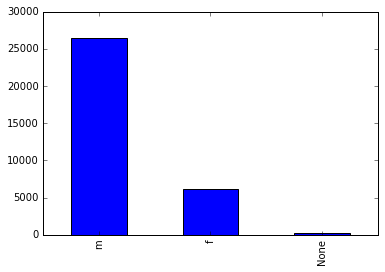


age


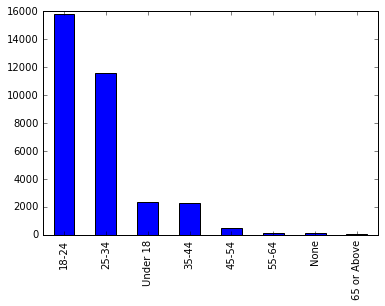


marital_stat


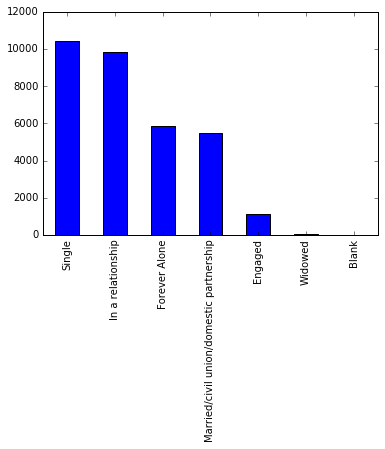


employment_stat


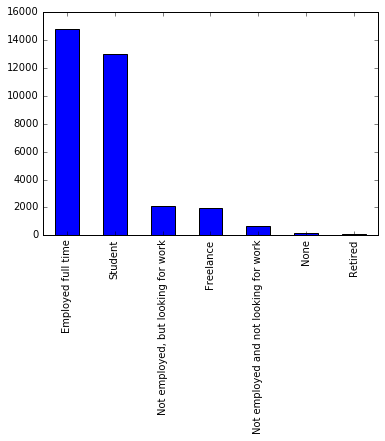


military


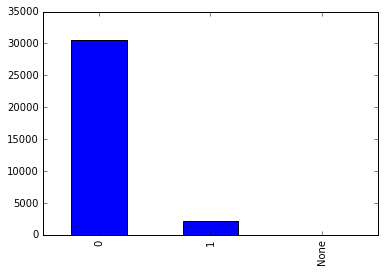


children_house


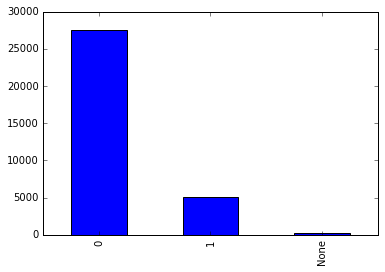


education_level


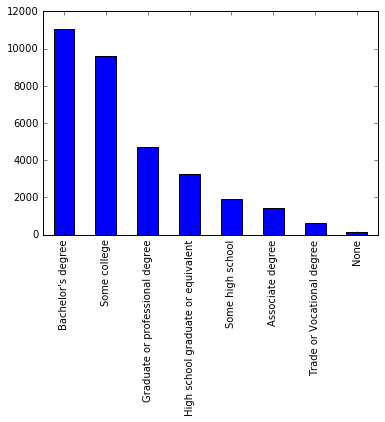


income


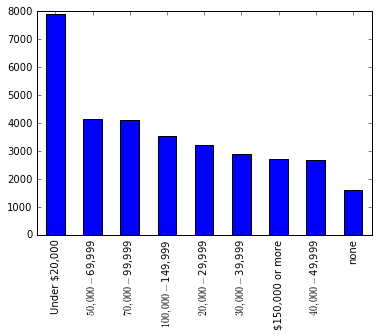


dogorcat


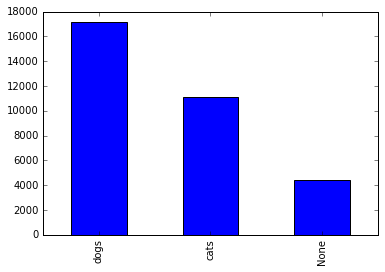


cheese


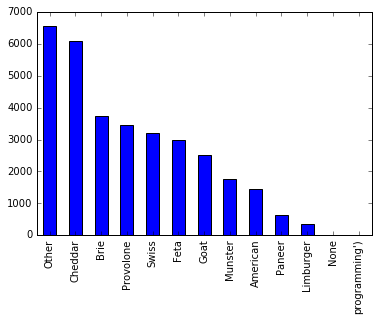

In [39]:
columns = X_for_eda.columns

for column in columns:
    print column
    df[column].value_counts().plot(kind='bar')
    show()
    print

In [40]:
columns = X_for_eda.columns

for column in columns:
    print column
    print df[column].value_counts()
    print

gender
m       26418
f        6135
None      201
Name: gender, dtype: int64

age
18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: age, dtype: int64

marital_stat
Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: marital_stat, dtype: int64

employment_stat
Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                        

### 2. Use Pearson's Correlation Coefficient, determine which variables are most highly collinear, and graph the results. (hint: http://stanford.edu/~mwaskom/ software/seaborn/examples/ many_pairwise_correlations. html)

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

In [42]:
X1= X_no_countryreddit.copy()
X1.describe()

,gender_None,gender_f,gender_m,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or Above,age_None,...,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
count,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,...,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000
mean,0.006137,0.187305,0.806558,0.482445,0.353392,0.068908,0.015326,0.004274,0.001832,0.002687,...,0.091317,0.076815,0.010289,0.054039,0.000305,0.200342,0.018868,0.105453,0.098125,0.000031
std,0.078097,0.390162,0.395002,0.499699,0.478030,0.253301,0.122849,0.065239,0.042761,0.051764,...,0.288064,0.266302,0.100912,0.226098,0.017471,0.400262,0.136061,0.307141,0.297489,0.005525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
d = pd.DataFrame(data=X1,
                 columns=X1.columns)

In [44]:
### Computing the correlation matrix
corr = d.corr()
corr

,gender_None,gender_f,gender_m,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or Above,age_None,...,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
gender_None,1.000000,-0.037724,-0.160452,-0.035184,0.002427,-0.001313,-0.003439,-0.005148,0.014919,0.381091,...,0.003590,-0.009454,-0.004138,0.033091,-0.001373,-0.000262,0.000596,-0.011705,0.000364,-0.000434
gender_f,-0.037724,1.000000,-0.980288,0.047638,-0.032750,-0.027108,0.009537,0.010528,0.017864,-0.008289,...,0.047477,0.083378,-0.023358,-0.010913,0.009527,-0.043812,0.017970,-0.022154,-0.038142,-0.002653
gender_m,-0.160452,-0.980288,1.000000,-0.040098,0.031868,0.027036,-0.008741,-0.009381,-0.020595,-0.067160,...,-0.047605,-0.080487,0.023890,0.004236,-0.009139,0.043327,-0.017868,0.024197,0.037602,0.002706
age_18-24,-0.035184,0.047638,-0.040098,1.000000,-0.713762,-0.262653,-0.120453,-0.063257,-0.041361,-0.050112,...,0.004880,-0.025429,-0.014279,-0.001602,-0.002883,-0.012640,-0.020725,0.000922,0.024322,-0.005335
age_25-34,0.002427,-0.032750,0.031868,-0.713762,1.000000,-0.201115,-0.092232,-0.048436,-0.031670,-0.038371,...,0.011309,0.031627,-0.000059,-0.004662,0.005360,0.000326,0.032204,0.012349,-0.031518,0.007474
age_35-44,-0.001313,-0.027108,0.027036,-0.262653,-0.201115,1.000000,-0.033940,-0.017824,-0.011654,-0.014120,...,-0.008830,0.015674,0.003318,-0.012777,0.002145,0.021630,-0.001404,-0.017270,-0.009914,-0.001503
age_45-54,-0.003439,0.009537,-0.008741,-0.120453,-0.092232,-0.033940,1.000000,-0.008174,-0.005345,-0.006475,...,-0.009353,-0.002390,0.006982,-0.005636,-0.002180,0.005854,-0.008168,-0.006423,0.013986,-0.000689
age_55-64,-0.005148,0.010528,-0.009381,-0.063257,-0.048436,-0.017824,-0.008174,1.000000,-0.002807,-0.003401,...,-0.002899,0.003947,0.011870,-0.005310,-0.001145,0.001113,-0.009086,-0.002687,-0.002733,-0.000362
age_65 or Above,0.014919,0.017864,-0.020595,-0.041361,-0.031670,-0.011654,-0.005345,-0.002807,1.000000,-0.002223,...,-0.001187,0.009092,0.009783,0.002393,-0.000749,-0.000037,-0.005941,-0.005410,0.002670,-0.000237
age_None,0.381091,-0.008289,-0.067160,-0.050112,-0.038371,-0.014120,-0.006475,-0.003401,-0.002223,1.000000,...,0.001974,-0.010542,0.000553,0.063246,-0.000907,-0.008296,-0.002863,-0.008219,-0.007207,-0.000287


In [45]:
### Creating mask for the triangle
mask= np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

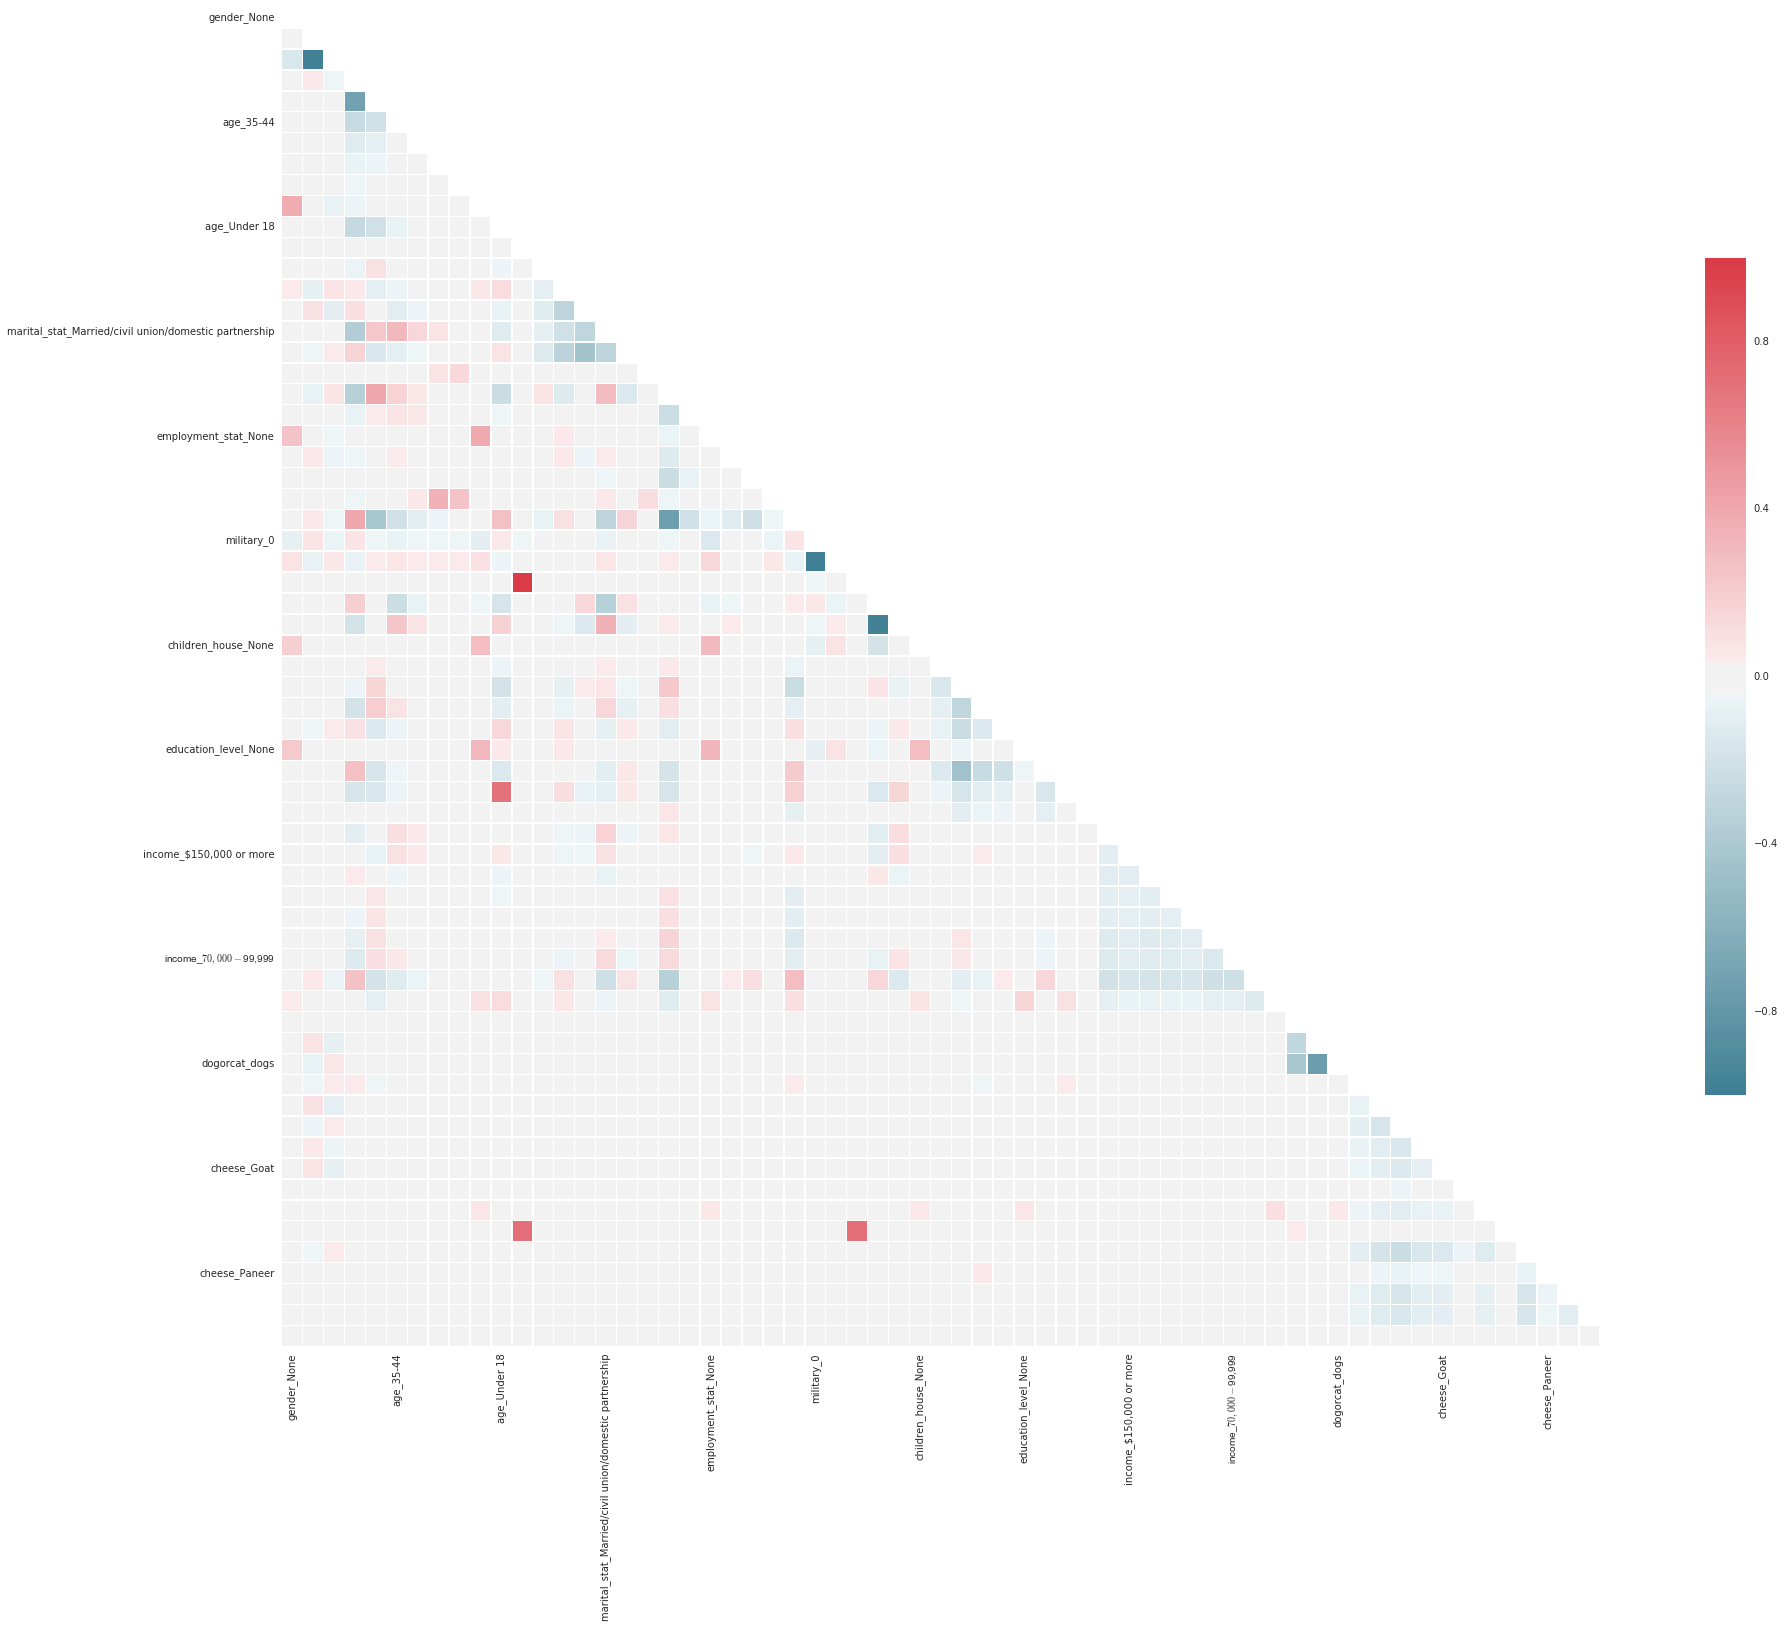

In [46]:
#### taken from http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [47]:
corr.stack().sort_values()

military_0                                             military_1                                              -0.998795
military_1                                             military_0                                              -0.998795
gender_f                                               gender_m                                                -0.980288
gender_m                                               gender_f                                                -0.980288
children_house_1                                       children_house_0                                        -0.975109
children_house_0                                       children_house_1                                        -0.975109
dogorcat_cats                                          dogorcat_dogs                                           -0.753211
dogorcat_dogs                                          dogorcat_cats                                           -0.753211
employment_stat_Student         

In [48]:
corr.loc[:,:] = np.tril(corr, -1)
corr.stack().sort_values()

military_1                                             military_0                                              -0.998795
gender_m                                               gender_f                                                -0.980288
children_house_1                                       children_house_0                                        -0.975109
dogorcat_dogs                                          dogorcat_cats                                           -0.753211
employment_stat_Student                                employment_stat_Employed full time                      -0.736561
age_25-34                                              age_18-24                                               -0.713762
education_level_Some college                           education_level_Bachelor's degree                       -0.459320
marital_stat_Single                                    marital_stat_In a relationship                          -0.447470
employment_stat_Student         

## Random forest model that predicts YOUR dependent variable based on the remaining variables.  If your dependent variable is muti-class (more than just two classes) then I'd like you to use a confusion matrix to measure model performance.

In [49]:
## from the above results we can see that we should drop the country and reddit data. Here im going to create a variable.
###Dropping the country data and reddit data
Xf = df.copy()
Xf.drop(["country_data", "subreddit_data"], axis=1, inplace=True)
Xf.columns

Index([u'gender', u'age', u'marital_stat', u'employment_stat', u'military',
       u'children_house', u'education_level', u'income', u'dogorcat',
       u'cheese'],
      dtype='object')

In [50]:
categorical_variables = Xf.columns

for variable in categorical_variables:
    Xf[variable].fillna("None", inplace=True)
    dummies = pd.get_dummies(Xf[variable], prefix=variable)
    Xf = pd.concat([Xf, dummies], axis=1)

In [51]:
Xf.drop(["military_1","military_None"], axis=1, inplace=True)
y = Xf.pop("military_0")

In [52]:
def printall(X, max_rows=20):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
printall(Xf)

,gender,age,marital_stat,employment_stat,military,children_house,education_level,income,dogorcat,cheese,gender_None,gender_f,gender_m,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or Above,age_None,age_Under 18,marital_stat_Blank,marital_stat_Engaged,marital_stat_Forever Alone,marital_stat_In a relationship,marital_stat_Married/civil union/domestic partnership,marital_stat_Single,marital_stat_Widowed,employment_stat_Employed full time,employment_stat_Freelance,employment_stat_None,employment_stat_Not employed and not looking for work,"employment_stat_Not employed, but looking for work",employment_stat_Retired,employment_stat_Student,children_house_0,children_house_1,children_house_None,education_level_Associate degree,education_level_Bachelor's degree,education_level_Graduate or professional degree,education_level_High school graduate or equivalent,education_level_None,education_level_Some college,education_level_Some high school,education_level_Trade or Vocational degree,"income_$100,000 - $149,999","income_$150,000 or more","income_$20,000 - $29,999","income_$30,000 - $39,999","income_$40,000 - $49,999","income_$50,000 - $69,999","income_$70,000 - $99,999","income_Under $20,000",income_none,dogorcat_None,dogorcat_cats,dogorcat_dogs,cheese_American,cheese_Brie,cheese_Cheddar,cheese_Feta,cheese_Goat,cheese_Limburger,cheese_Munster,cheese_None,cheese_Other,cheese_Paneer,cheese_Provolone,cheese_Swiss,cheese_programming')
0,m,25-34,Blank,Employed full time,None,0,Bachelor's degree,"$150,000 or more",None,None,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,m,25-34,Blank,Employed full time,None,0,Bachelor's degree,"$150,000 or more",None,None,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,f,18-24,Blank,Freelance,None,0,Some college,"Under $20,000",None,None,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,m,25-34,Blank,Freelance,None,0,Bachelor's degree,"$150,000 or more",None,None,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,f,25-34,Blank,Employed full time,None,0,Bachelor's degree,"$70,000 - $99,999",None,None,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,m,25-34,Married/civil union/domestic partnership,Employed full time,0,0,Bachelor's degree,"$150,000 or more",dogs,Cheddar,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
6,m,25-34,In a relationship,Employed full time,0,0,Some college,none,dogs,Cheddar,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,m,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",0,0,Bachelor's degree,"$70,000 - $99,999",dogs,American,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8,m,35-44,Married/civil union/domestic partnership,Employed full time,0,0,Bachelor's degree,"$150,000 or more",cats,Provolone,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,m,25-34,In a relationship,Freelance,0,0,Some college,"$70,000 - $99,999",cats,Munster,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [53]:
Xf.columns

Index([u'gender', u'age', u'marital_stat', u'employment_stat', u'military',
       u'children_house', u'education_level', u'income', u'dogorcat',
       u'cheese', u'gender_None', u'gender_f', u'gender_m', u'age_18-24',
       u'age_25-34', u'age_35-44', u'age_45-54', u'age_55-64',
       u'age_65 or Above', u'age_None', u'age_Under 18', u'marital_stat_Blank',
       u'marital_stat_Engaged', u'marital_stat_Forever Alone',
       u'marital_stat_In a relationship',
       u'marital_stat_Married/civil union/domestic partnership',
       u'marital_stat_Single', u'marital_stat_Widowed',
       u'employment_stat_Employed full time', u'employment_stat_Freelance',
       u'employment_stat_None',
       u'employment_stat_Not employed and not looking for work',
       u'employment_stat_Not employed, but looking for work',
       u'employment_stat_Retired', u'employment_stat_Student',
       u'children_house_0', u'children_house_1', u'children_house_None',
       u'education_level_Associate degre

In [54]:
y

0        0
1        0
2        0
3        0
4        0
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       0
24       1
25       1
26       1
27       1
28       1
29       1
        ..
32724    1
32725    1
32726    1
32727    1
32728    1
32729    1
32730    1
32731    1
32732    1
32733    1
32734    0
32735    1
32736    0
32737    0
32738    1
32739    1
32740    1
32741    0
32742    1
32743    1
32744    1
32745    1
32746    1
32747    1
32748    0
32749    1
32750    1
32751    1
32752    1
32753    1
Name: military_0, dtype: float64

In [59]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X1, y)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  1.0


In [60]:
model.feature_importances_

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.99,  0.01,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

K:\Anaconda IF\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


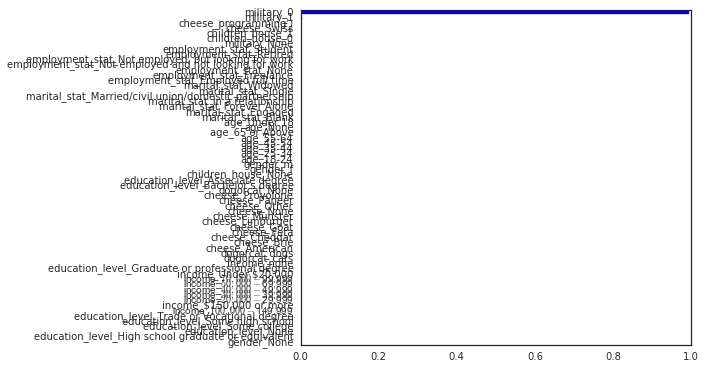

In [65]:
feature_importances = pd.Series(model.feature_importances_, index=X1.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6));

K:\Anaconda IF\lib\site-packages\ipykernel\__main__.py:39: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


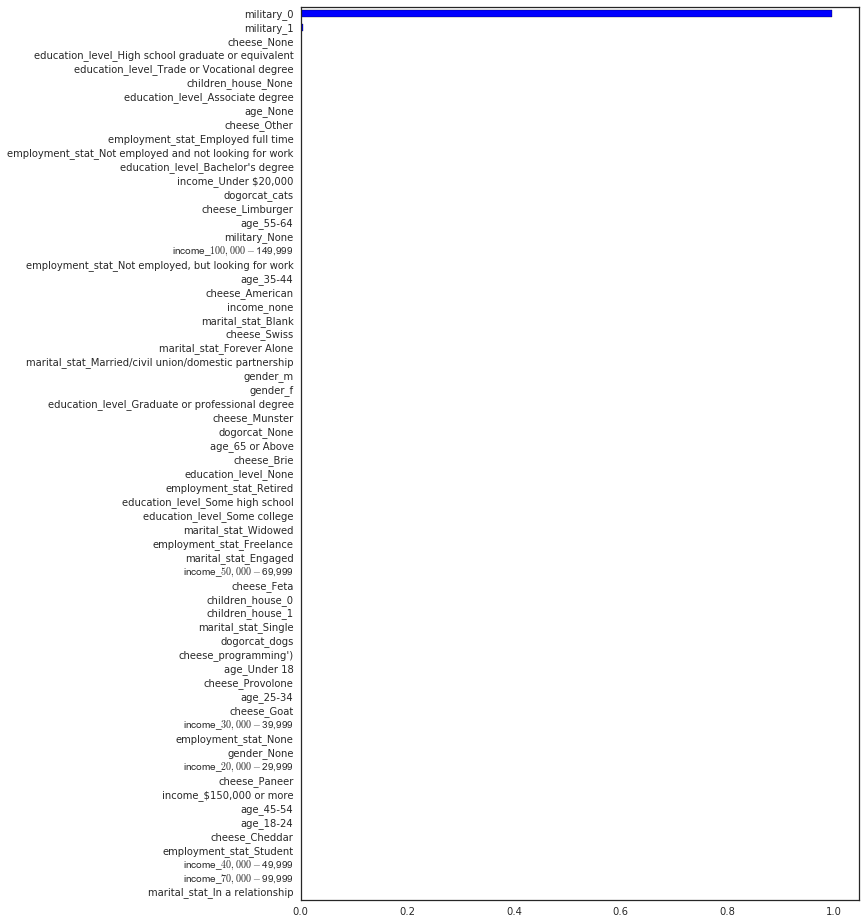

In [66]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, X1.columns)

30 trees
C-stat:  1.0

50 trees
C-stat:  1.0

100 trees
C-stat:  1.0

200 trees
C-stat:  1.0

500 trees
C-stat:  1.0

1000 trees
C-stat:  1.0

2000 trees
C-stat:  1.0



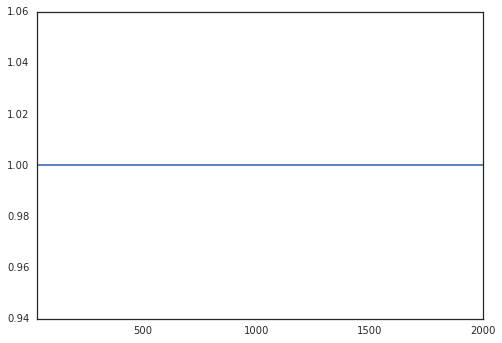

In [68]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X1, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  1.0

None option
C-stat:  1.0

sqrt option
C-stat:  1.0

log2 option
C-stat:  1.0

0.9 option
C-stat:  1.0

0.2 option
C-stat:  1.0



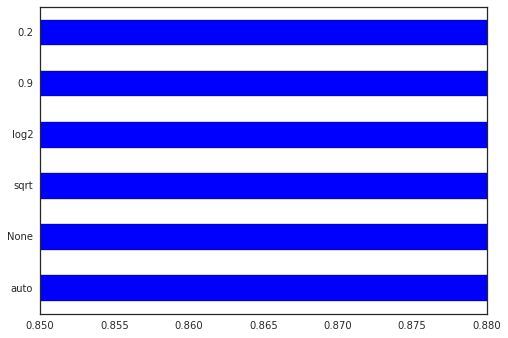

In [70]:
results2 = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X1, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results2.append(roc)
    print ""
    
pd.Series(results2, max_features_options).plot(kind="barh", xlim=(.85,.88));

1 min samples
C-stat:  1.0

2 min samples
C-stat:  1.0

3 min samples
C-stat:  1.0

4 min samples
C-stat:  1.0

5 min samples
C-stat:  1.0

6 min samples
C-stat:  1.0

7 min samples
C-stat:  1.0

8 min samples
C-stat:  1.0

9 min samples
C-stat:  1.0

10 min samples
C-stat:  1.0



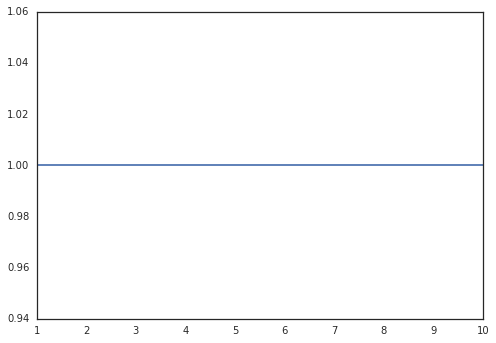

In [72]:
results3 = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X1, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results3.append(roc)
    print ""
    
pd.Series(results3, min_samples_leaf_options).plot();

### Final model first pass

In [73]:
model = RandomForestRegressor(n_estimators=500, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=10)
model.fit(X1, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  1.0
